# Judy

## How does the favorite genre and the diversity of music genres an individual listens to influence the perceived music effects on their well-being and their self-reported mental health conditions?

I am interested in understanding how music affects mental health. By looking at how different genres and favorite genres impact mental health conditions like anxiety and depression, I hope to find ways to use music more effectively to improve well-being.

### Required Packages

In [1]:
# Run this cell to ensure that altair plots show up without having
# the notebook be really large.
# We will talk more about what these lines do later in the course

import os
import altair as alt
import pandas as pd
from toolz.curried import pipe

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

## 1. Loading and inspecting the data

#### Reading Data
I will first start by reading the data.

In [2]:
mxmh = pd.read_csv('../../data/raw/mxmh_survey_results.csv', parse_dates=['Timestamp'])
mxmh

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2022-10-30 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,2022-11-01 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,2022-11-03 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,2022-11-04 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


#### Inspecting the data

Let's inspect the first 5 columns as well.

In [3]:
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### Dataset Information

Let's also explore some information about the dataset such as its size, column names, data types, number of NaN values and a summary description of the dataframe's numerical columns (range, central tendency, spread).

#### Dataset Size

In [4]:
mxmh.shape

(736, 33)

We can see that the dataset has 736 rows and 33 columns.

#### Column names

In [5]:
mxmh.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

The 33 columns are 'Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'

#### Data types 

In [6]:
mxmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     736 non-null    datetime64[ns]
 1   Age                           735 non-null    float64       
 2   Primary streaming service     735 non-null    object        
 3   Hours per day                 736 non-null    float64       
 4   While working                 733 non-null    object        
 5   Instrumentalist               732 non-null    object        
 6   Composer                      735 non-null    object        
 7   Fav genre                     736 non-null    object        
 8   Exploratory                   736 non-null    object        
 9   Foreign languages             732 non-null    object        
 10  BPM                           629 non-null    float64       
 11  Frequency [Classical]         73

There are 25 categorical attributes, 1 temporal attribute, 4 ordinal attributes, and 7 quantitative attributes.

In [7]:
mxmh.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

We can see that there is 1 missing value for the attribute 'Age', 'Primary streaming service', and 'Composer'. There are also 3 missing values for 'While Working', 4 missing values for 'Instrumentalist' and 'Foreign Languages', 107 missing values for BPM and 8 missing values for 'Music effects'

#### Summary Statistics

In [8]:
mxmh.describe()

,Timestamp,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,736,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,2022-09-03 19:54:51.849184768,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
min,2022-08-27 19:29:02,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2022-08-28 19:58:27.249999872,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,2022-08-29 13:41:45.500000,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,2022-09-03 17:26:35.500000,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,2022-11-09 01:55:20,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000
std,NaN,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017


The summary description of the data frame's numerical columns is shown above. It displays the range, central tendency and spread of the quantitative attributes.

## 2. Cleaning the Data

At first glance, the attribute 'Permissions' does not seem to be very relevant to the analysis. Let's check how many unique values this attribute has.

In [9]:
mxmh['Permissions'].nunique()

1

In [10]:
mxmh['Permissions'].unique()

array(['I understand.'], dtype=object)

Since there is only one possible value for Permissions which is 'I understand', we can safely drop this column as it will not be relevant to the analysis.

In [11]:
mxmh.drop('Permissions', axis=1, inplace=True)
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


Moreover, the timestamp is the date and time when the form was submitted which is also not relevant to the analysis, so we will also drop this column.

In [12]:
mxmh.drop('Timestamp', axis=1)
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


Now, we end up with 31 columns.

#### Handling Missing Values

Next, since we don't want to have missing values in the dataset, we will perform some data cleaning. For the attributes with less than 10 missing values, we will just remove the rows with missing data since it will not be affecting the results too much as we have 736 observations so the difference is negligible. Moreover, after looking at the distributions, it further supports the idea that it will not make a difference.

In [13]:
# Removing rows of attributes with <10 missing values 
for col in mxmh.columns:
    if (mxmh[col].isnull().sum() < 10):
        mxmh = mxmh.dropna(subset=[col])

In [14]:
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


However, for the 'BPM' attribute that has 107 missing values, we will impute the missing values with the median value of BPM so that we don't lose data and to ensure that the results are not biased.

In [15]:
# Impute missing values in BPM
mxmh.fillna(mxmh['BPM'].median(), inplace=True)

In [16]:
# Let's check for missing values
mxmh.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

After checking, we can see that there are no missing values anymore in our dataset.

#### Feature Engineering 

There are around 16 columns that correspond to how frequently the respondent listens to a specific genre (all categories of the 'Fav genre' attribute) and I'm curious to explore the diversity of genres that individuals listen to. So, I will create a new attribute called 'genre diversity score' that will help answer how frequently a participant listens to different music genres.

In [17]:
# Define frequency mapping
frequency_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Very frequently": 3
}

# List of genre frequency columns
genre_columns = [
    "Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]",
    "Frequency [Gospel]", "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]",
    "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]", "Frequency [Pop]",
    "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"
]

# Convert frequency values to numerical scores
for col in genre_columns:
    mxmh[col] = mxmh[col].map(frequency_mapping)

# Calculate genre diversity as the count of genres listened to at least "Rarely"
mxmh["Genre Diversity Score"] = (mxmh[genre_columns] > 0).sum(axis=1)

# Display dataset with the new column
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Genre Diversity Score
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,0,1,1,3,7.0,7.0,10.0,2.0,No effect,10
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,2,0,0,0,9.0,7.0,3.0,3.0,Improve,9
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,3,3,0,1,7.0,2.0,5.0,9.0,Improve,10
5,2022-08-27 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,3,3,3,0,8.0,8.0,7.0,7.0,Improve,12
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,1,0,0,2,4.0,8.0,6.0,0.0,Improve,12


## 3. Exploratory Data Analysis

Now, let's move on to the EDA part.

### Univariate Analysis

#### Quantitative Variables

First, we can start looking at the individual distributions of the mental health scores (anxiety, depression, insomnia, and OCD) in order to understand how respondents are experiencing these conditions.

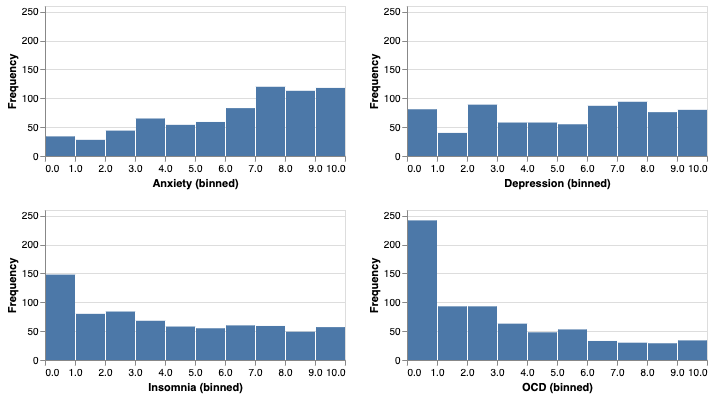

In [18]:
mho_distributions = alt.Chart(mxmh).mark_bar().encode(
                     alt.X(alt.repeat(), bin=alt.BinParams(maxbins=15), type = 'quantitative'),
                    alt.Y('count():Q', title='Frequency')
                    ).properties(height=150).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2).resolve_scale(y="shared")
mho_distributions

We can see the shape of the data for each of the mental health outcomes. It seems like none of them follow a Normal distribution. 
- Anxiety: The histogram shows that the data is somewhat left-skewed, indicating that many people experience higher levels of anxiety.
- Depression: The histogram is not uniform and shows two peaks (one from 0-3.0) and the other at (6.0-7.0).
- Insomnia: The histogram shows that the data is more right-skewed, indicating that more people experience lower levels of insomnia, with a peak at 0.
- OCD: The histogram shows that the data is more right-skewed, indicating that more people experience lower levels of OCD, with a peak at 0.

Let's explore the distribution of the genre diversity score to examine how varied individuals' music preferences are and identify any patterns in genre consumption. This will help us understand whether most participants tend to stick to a few genres or explore a wide range of musical styles.

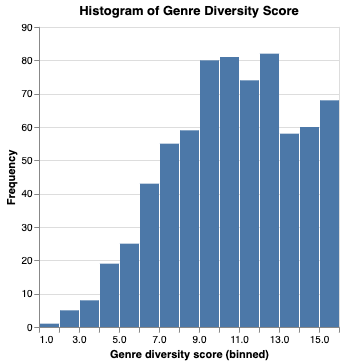

In [19]:
gds_distribution = alt.Chart(mxmh).mark_bar().encode(
                     alt.X('Genre Diversity Score:Q',  bin=alt.BinParams(maxbins=15), title='Genre diversity score (binned)'),
                    alt.Y('count():Q', title='Frequency')
                    ).properties(title='Histogram of Genre Diversity Score')
gds_distribution

By looking at the histogram of genre distribution, I notice that the distribution of 'Genre Diversity Score' is somewhat unimodal and slightly left-skewed, with a peak around 9-11. There is a gradual increase in frequency from the lower scores towards the peak, followed by a sharper drop-off on the right side, suggesting that very high genre diversity scores are less common than moderate to high scores. Additionally, there are relatively few scores below 5, implying that very low genre diversity is less common.

#### Qualitative Variables

Now, we can look more into the distribution of the music effects in order to understand the perceived impact of music on mental health.

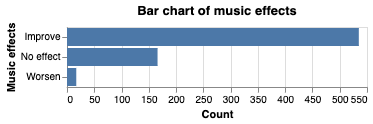

In [20]:
me_distribution = alt.Chart(mxmh).mark_bar().encode(
                     alt.Y('Music effects', title='Music effects'),
                    alt.X('count():Q', title='Count')
                    ).properties(title='Bar chart of music effects')
me_distribution

It seems that a larger number of people (> 500) who listen to music have experienced an improvement in their mental health condition compared to the ones who experienced no effects or worsening.

We can also take a look at the distribution of the preferred music genres with a bar chart to see the most popular to least popular genres.

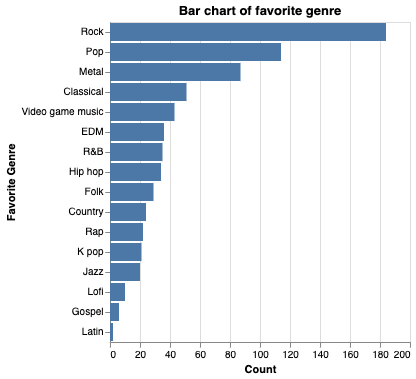

In [21]:
genre_distribution = alt.Chart(mxmh).mark_bar().encode(
                     alt.X('count():Q', title='Count'),
                    alt.Y('Fav genre', title='Favorite Genre', sort='-x')
                    ).properties(title='Bar chart of favorite genre')
genre_distribution

From the bar chart, we can notice that 'Rock' is the most popular genre, with more than 180 people rating it as their favorite genre. In contrast, 'Latin' is the least popular genre.

### Bivariate Analysis

To see if people who listen to a wide range of music genres experience different health conditions, we can explore the relationship between the genre diversity score and mental health conditions using a scatterplot.

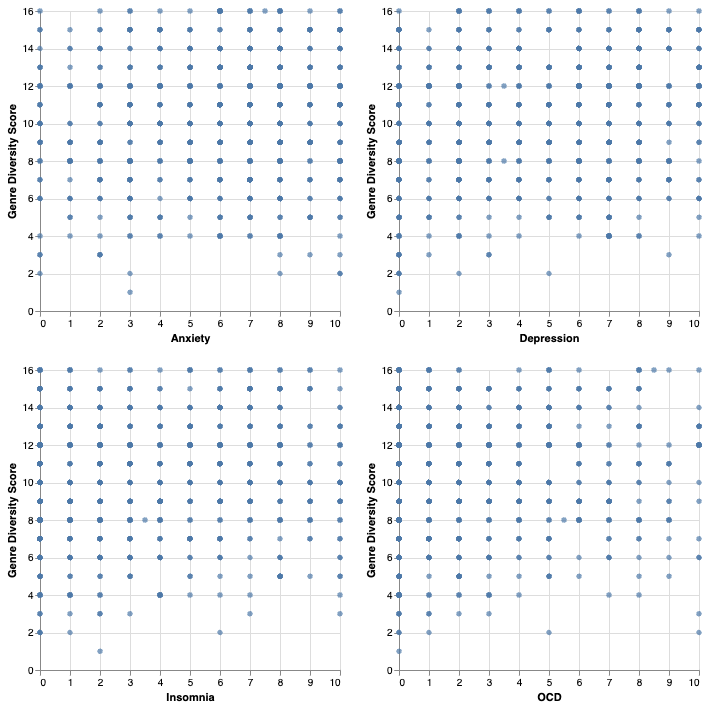

In [22]:
gds_mhc_boxplot = alt.Chart(mxmh).mark_circle().encode(
                     alt.X(alt.repeat(), type='quantitative'),
                    alt.Y('Genre Diversity Score', title='Genre Diversity Score')
                    ).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)
gds_mhc_boxplot

From the charts, we can observe that the data points are scattered relatively randomly across each plot, so there is no correlation between the number of genres an individual listens to and any of the mental health conditions. Let's calculate correlation scores as a sanity check.

In [23]:
anxiety_correlation = mxmh["Genre Diversity Score"].corr(mxmh["Anxiety"])
print(f"Correlation between Genre Diversity Score and Anxiety: {anxiety_correlation}")

depression_correlation = mxmh["Genre Diversity Score"].corr(mxmh["Depression"])
print(f"Correlation between Genre Diversity Score and Depression: {depression_correlation}")

insomnia_correlation = mxmh["Genre Diversity Score"].corr(mxmh["Insomnia"])
print(f"Correlation between Genre Diversity Score and Insomnia: {insomnia_correlation}")

ocd_correlation = mxmh["Genre Diversity Score"].corr(mxmh["OCD"])
print(f"Correlation between Genre Diversity Score and OCD: {ocd_correlation}")

Correlation between Genre Diversity Score and Anxiety: 0.09125777315081175
Correlation between Genre Diversity Score and Depression: 0.17216601494984282
Correlation between Genre Diversity Score and Insomnia: 0.1032427801772291
Correlation between Genre Diversity Score and OCD: 0.06065139798132307


Since there wasn't any relationship between the diversity of genres and mental health conditions, let's explore the relationship between the favorite genres and the mental health conditions to determine if different favorite genres correlate with different mental health conditions.

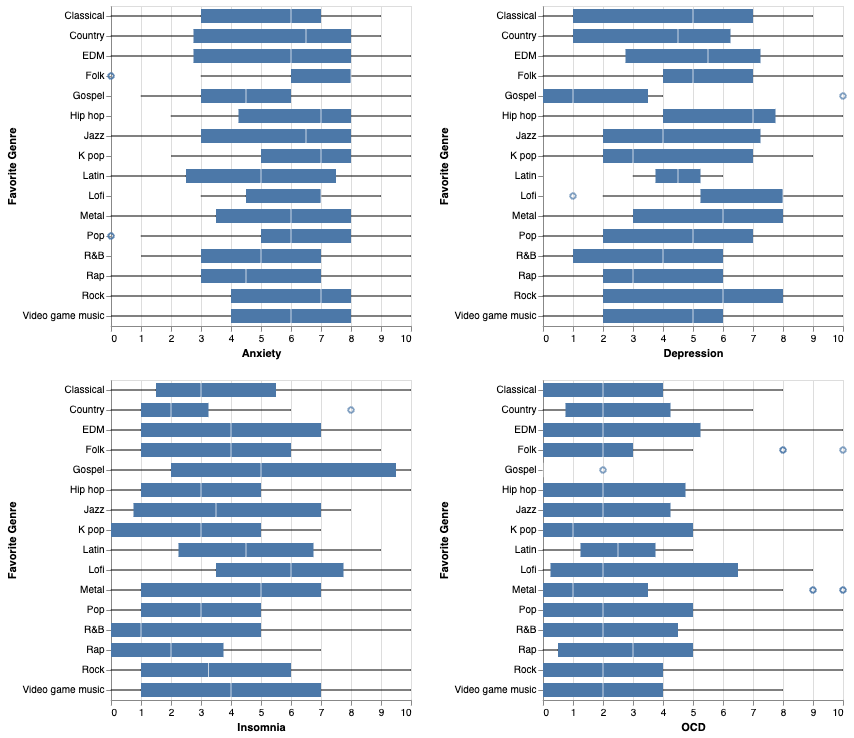

In [24]:
mhc_genres_boxplot = alt.Chart(mxmh).mark_boxplot().encode(
                     alt.X(alt.repeat(), type='quantitative'),
                    alt.Y('Fav genre', title='Favorite Genre', sort='x'),
                    ).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)
mhc_genres_boxplot

- Anxiety: We can see a high median of 8 for Folk music, which suggests that on average, individuals who prefer Folk music have the highest self-reported anxiety score, followed by Rock, Lofi, Kpop, and Hip Hop with a median of 7. The preferred genre that shows the lowest median anxiety scores are Rap and Gospel.

- Depression: We can see a high median of 8 for Lofi music, which suggests that on average, individuals who prefer Lofi music have the highest self-reported depression score, and Gospel has a median of 1, which shows the lowest median depression score.

- Insomnia: The median scores for insomnia were overall less than the anxiety and depression ones. We can see a high median of 6 for Lofi music, which suggests that on average, individuals who prefer Lofi music have the highest self-reported insomnia score, and R&B has a median of 1, which shows the lowest median insomnia score.

- OCD: The median scores for insomnia were overall even less than all the other ones. We can see a median of 2.5 for Latin music, which suggests that, on average, individuals who prefer Latin music have the highest self-reported OCD score, and Metal and Kpop have a median of 1, which shows the lowest median OCD scores. 

In summary, the graphs show the distribution of mental health condition scores for each favorite music genre. There are differences in the distribution, median, spread, and outliers across genres, suggesting potential associations between favorite music genres and mental health conditions. 

Let's now see if diversity in music genres affects whether people perceive music as improving or worsening their well-being.

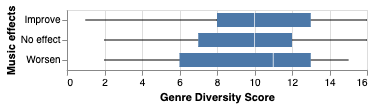

In [25]:
gds_me__boxplot = alt.Chart(mxmh).mark_boxplot().encode(
                     alt.X('Genre Diversity Score', title='Genre Diversity Score'),
                    alt.Y('Music effects', title='Music effects')
                    )
gds_me__boxplot

There appears to be a trend suggesting that individuals who report that music improves their mood tend to have higher genre diversity scores, while those who report music worsens their mood tend to have lower genre diversity scores. Those who report no effect fall in between. Further statistical analysis might be needed to confirm this trend and determine statistical significance.

Let's now look into the relationship between mental health scores music effects.

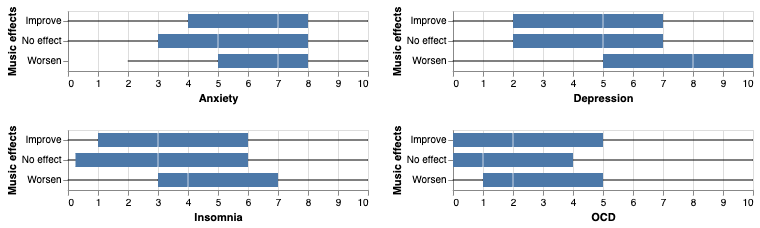

In [26]:
mhc_me_boxplot = alt.Chart(mxmh).mark_boxplot().encode(
    alt.Y("Music effects:N"),
    alt.X(alt.repeat(), type="quantitative"),
).repeat(['Anxiety', 'Depression', 'Insomnia', 'OCD'], columns=2)

mhc_me_boxplot 

- Anxiety: There seems to be a trend where individuals with higher anxiety scores are more likely to report music having either an improving or worsening effect on their anxiety, while those with a wider range of anxiety scores report no effect.

- Depression: Similar to anxiety, there's a trend where individuals with higher depression scores are more likely to report music having either an improving or worsening effect on their depression. The "Worsen" category is particularly high, suggesting a strong association between high depression scores and feeling like the music worsens mental health.

- Insomnia: Unlike anxiety and depression, there's a trend where individuals with lower insomnia scores are more likely to report music having either no effect or a worsening effect on their insomnia. Individuals with moderate insomnia scores are more likely to report improvement.

- OCD: Similar to insomnia, there's a trend where individuals with lower OCD scores are more likely to report music having either no effect or a worsening effect on their OCD. Individuals with moderate to higher OCD scores are more likely to report improvement.


Let's also identify whether people from different favorite genres feel whether music improves, worsens, or has no effect on their mental health.

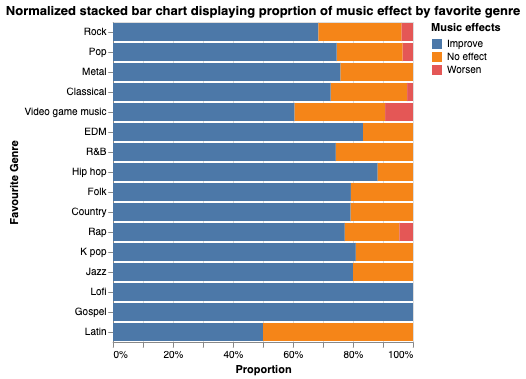

In [29]:
stacked_barchart = alt.Chart(mxmh).mark_bar().encode(
    alt.X('count()', title='Proportion').stack('normalize'),
    alt.Y('Fav genre:N', title='Favourite Genre', sort='-x'),
    color='Music effects:N'
).properties(
    title="Normalized stacked bar chart displaying proprtion of music effect by favorite genre"
)

stacked_barchart

The chart shows that 'Rock' and 'Pop' are the most popular favorite genres among the respondents. Across all genres, music has an overall positive effect ("Improve") on individuals' well-being, especially for 'Lofi' and 'Gospel' genres. However, there are variations in the distribution of music effects across different genres. As we can see, 'Latin' has a higher proportion of individuals reporting "No effect" compared to other genres. The "Worsen" effect is present in only some of the genres, namely 'Rock', 'Pop', 'Classical', 'Video game music', and 'Rap', where video game music has more people saying that it worsened their well-being.